In [1]:
import pandas as pd
import json
from datetime import datetime

In [7]:
data = pd.read_csv("FastqToCram_sub1249.tsv", sep='\t')

In [8]:
data.statusLastChangedDate = data.statusLastChangedDate.map(datetime.fromisoformat)
entityType = json.loads(data.workflowEntity[0])['entityType']
data.workflowEntity = data.workflowEntity.map(lambda x: json.loads(x)['entityName'])


# Failed Samples

In [12]:
failed = data[data.status == "Failed"]
failed_sample_set = pd.DataFrame({f"membership:{entityType}_set_id":"subm_failed", entityType:failed.workflowEntity})
failed_sample_set

,membership:sample_set_id,sample
0,subm_failed,00-090R1_NORMAL
24,subm_failed,05-221A_NORMAL
33,subm_failed,12-011C1_NORMAL
34,subm_failed,12-021C1_NORMAL
58,subm_failed,AAPC-IP_LG-069-Normal-SM-3NC71
...,...,...
1064,subm_failed,RP-1532_PCProject_0133_BLOOD_BC_v1_Exome_OnPrem
1069,subm_failed,RP-1532_PCProject_0187_BLOOD_BC_v1_Exome_OnPrem
1079,subm_failed,RP-1532_PCProject_0383_SALIVA_v4_Exome_OnPrem
1084,subm_failed,RP-1532_PCProject_0588_SALIVA_v2_Exome_OnPrem


In [13]:
failed_sample_set.to_csv("subm_failed.tsv", sep='\t', index=False)

# Other Analysis

<Axes: >

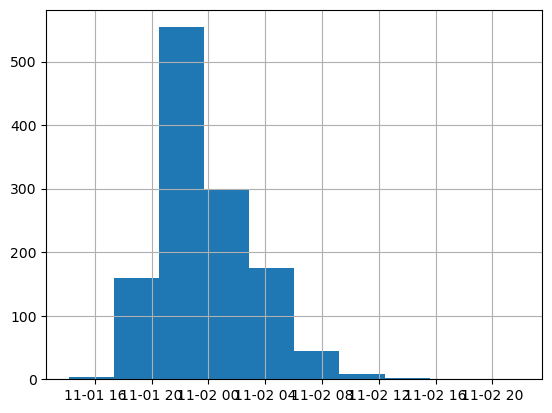

In [19]:
data.statusLastChangedDate.hist()